### Required Libs
**NLTK**            : used for our Natural Language Processing tasks .<br>
**stopword**        : this are words like " a, am, at .. " . They hold less significane and thus are removed .<br>
**cosine_distance** : it the main part of our code, it will be use to calculate similarity score ( more about it in later sections ) .<br>
**numpy**           : aka Numerical Python , it is used for multi-dimensional array handling, and provides many essential mathematical functions .<br>
**networkx**        : it is usefull for graph manipulation and handling, pagerank algorithm is used with the help of this library .<br>

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Deciding Approach

#### Reading and Processing

In [11]:
# this function will read the article form the specified file_path / file_name

def read_article(file_name) :
    file = open(file_name, "r")
    return file

In [12]:
# we will need senctences for generating similarity matrix
# this function will extract sentences and return the sentence array

def extract_sentences(file) :
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop()

    return sentences

#### Similarity matrix



**Similarity Matrix** : <br>
it is a square matrix where each cell represents the similarity between two vectors using the cosine distance metric.

**Cosine Distance** :<br>
measures the cosine of the angle between two vectors in a multidimensional space. It's a measure of similarity between two non-zero vectors and is calculated as the cosine of the angle between them.


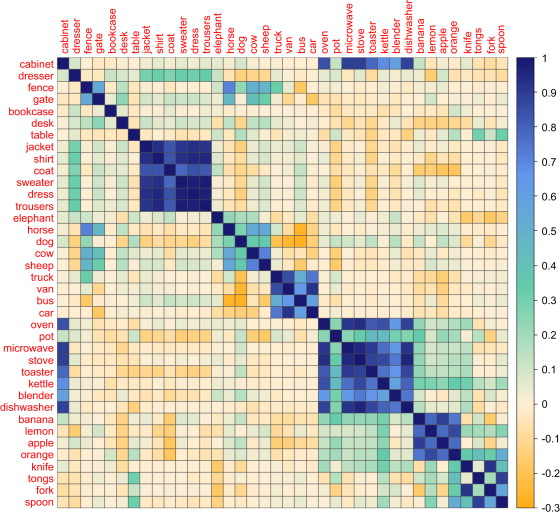

The diagonal will always be one since ( i , i )th vector pair will always be the same

In [13]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []

    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1

    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1

    return 1 - cosine_distance(vector1, vector2)

In [14]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

#### Final Function

lets use the *helper functions* to create the final main function .

In [36]:
def generate_summary(file_name, top_n):

    summarize_text = []

    # Step 1 - Read text anc split it
    article = read_article(file_name)
    sentences =  extract_sentences(article)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)

    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)

    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
    for i in ranked_sentence:
      print(i)

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize text
    print("\nSummarize Text: \n", ". ".join(summarize_text))

#### Testing out on some examples

In [35]:
generate_summary( "trump.txt", 5)

 xThe September 11 attacks, commonly known as 9/11,[e] were four coordinated Islamist suicide terrorist attacks carried out by Al-Qaeda against the United States on September 11, 2001
That morning, 19 terrorists hijacked four commercial airliners scheduled to travel from the East Coast to California
The hijackers crashed the first two planes into the Twin Towers of the World Trade Center in New York City, two of the world's five tallest buildings at the time, and aimed the next two flights toward targets in or near Washington, D.C., in an attack on the nation's capital
The third team succeeded in striking the Pentagon, the headquarters of the U.S
Department of Defense in Arlington County, Virginia, while the fourth plane crashed in rural Pennsylvania during a passenger revolt
The September 11 attacks killed 2,977 people, making them the deadliest terrorist attack in history, and instigated the multi-decade global war on terror, fought in Afghanistan, Iraq, and elsewhere.

(0.2409638268

#### Visualising Similarity Matrix

In [40]:
import matplotlib.pyplot as plt

In [45]:
def gen_matrix(file_name):

    summarize_text = []

    # Step 1 - Read text anc split it
    article = read_article(file_name)
    sentences =  extract_sentences(article)

    # Step 2 - Generate Similary Martix across sentences
    similarity_martix = build_similarity_matrix(sentences, stop_words)

    plt.figure(figsize=(8, 6))
    plt.imshow(similarity_martix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.title('Similarity Matrix')
    plt.xlabel('Sentences')
    plt.ylabel('Sentences')
    plt.show()

 xThe September 11 attacks, commonly known as 9/11,[e] were four coordinated Islamist suicide terrorist attacks carried out by Al-Qaeda against the United States on September 11, 2001
That morning, 19 terrorists hijacked four commercial airliners scheduled to travel from the East Coast to California
The hijackers crashed the first two planes into the Twin Towers of the World Trade Center in New York City, two of the world's five tallest buildings at the time, and aimed the next two flights toward targets in or near Washington, D.C., in an attack on the nation's capital
The third team succeeded in striking the Pentagon, the headquarters of the U.S
Department of Defense in Arlington County, Virginia, while the fourth plane crashed in rural Pennsylvania during a passenger revolt
The September 11 attacks killed 2,977 people, making them the deadliest terrorist attack in history, and instigated the multi-decade global war on terror, fought in Afghanistan, Iraq, and elsewhere.



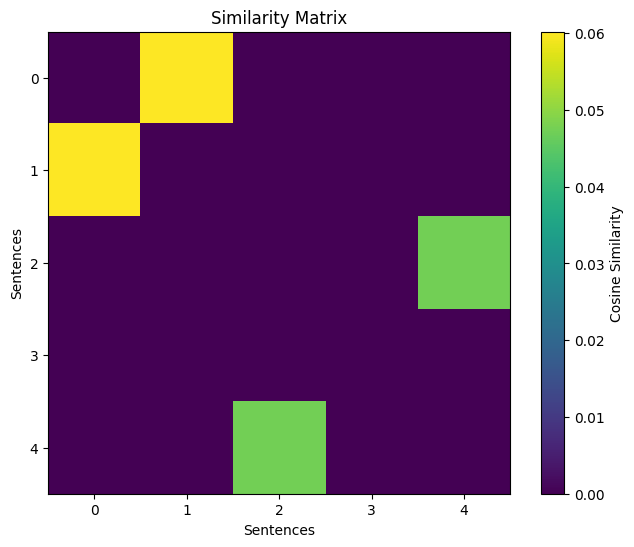

In [46]:
gen_matrix("trump.txt")